# PS2 

Tyler Amos

MACSS 30200

30 April 2018

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
def three_d_plot(x_list, y_list, z_mat, label_list, dim_list):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure(figsize = (dim_list[2], dim_list[3]))
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(x_list), np.array(y_list))
    Z = z_mat

    # Plot the surface.
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel(label_list[0])
    ax.set_ylabel(label_list[1])
    ax.set_zlabel(label_list[2])
    plt.title(label_list[3])
    ax.view_init(dim_list[0], dim_list[1])
    
def three_d_plot_matrix_inputs(X, Y, Z, label_list, dim_list):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure(figsize = (dim_list[2], dim_list[3]))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel(label_list[0])
    ax.set_ylabel(label_list[1])
    ax.set_zlabel(label_list[2])
    plt.title(label_list[3])
    ax.view_init(dim_list[0], dim_list[1])

# a)

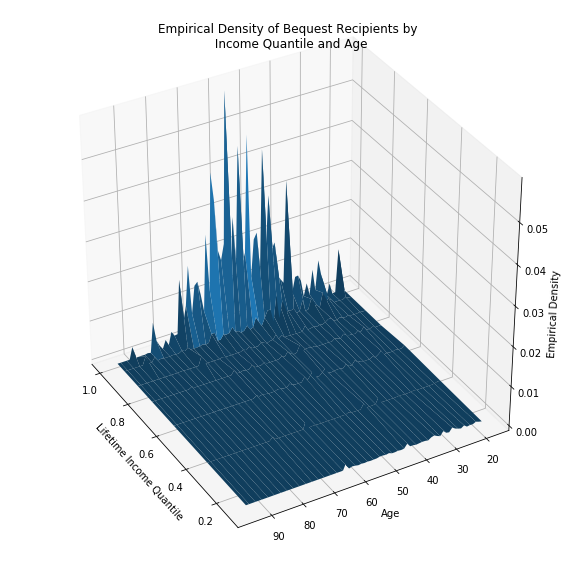

In [3]:
data = np.loadtxt("https://raw.githubusercontent.com/UC-MACSS/persp-research_Spr18/master/assignments/PS2/data/BQmat_orig.txt",
                 delimiter = ',')
income_brackets = [0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01]

# sum up quantiles and drop half of the difference so we get a midpoint
cum_income = [sum(income_brackets[:i+1]) - (income_brackets[i]/2) for i in range(len(income_brackets))]

# scale the data to sum nicely to 1
data_scaled = data / data.sum()

labs = ["Lifetime Income Quantile", "Age", "Empirical Density", "Empirical Density of Bequest Recipients by \n Income Quantile and Age"]
dims = [35, 150, 10, 10]
age_list = list(np.arange(18,96))

three_d_plot(cum_income, age_list, data_scaled, labs, dims)
plt.savefig("incomevsage3dsurface.png")

# b)


In this kernel density estimation, we use the lambda value as 
calculated by Scott's Rule. The calculated value is 0.19



The estimated density for a recipient who is 61 and in quartile 6
 for lifetime income is 0.0022050987746631457


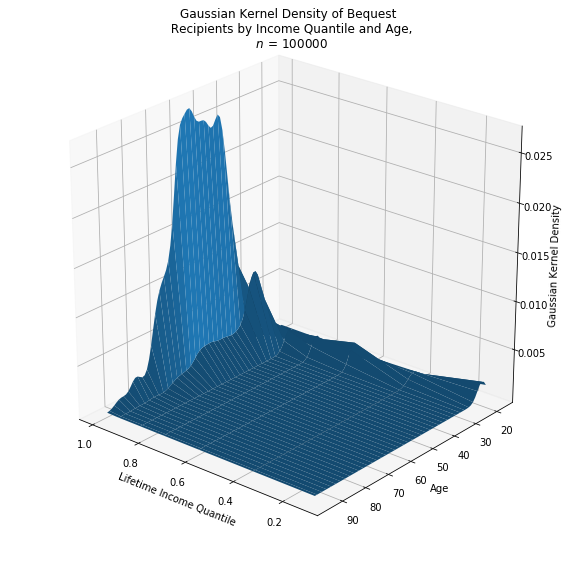

In [4]:
ages_vec = np.array(age_list)
abils_midpt = np.array(cum_income)
prop_mat_inc = np.sum(data_scaled, axis=0)
prop_mat_age = np.sum(data_scaled, axis=1)

np.random.seed(1212)
# take a large sample
lrg_sample = 100000
age_probs = np.random.multinomial(lrg_sample, prop_mat_age)
income_probs = np.random.multinomial(lrg_sample, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
    
# calculate the lambda value using Scott's Rule
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dimension_number = 3

lambda_val = lrg_sample **(-1./(dimension_number+4))

# set up the data and calculate the kernel
data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=lambda_val)

# plot
income_matrix, age_matrix = np.meshgrid(abils_midpt, ages_vec)
coords = np.vstack([item.ravel() for item in [age_matrix, income_matrix]])
BQkde = density(coords).reshape(age_matrix.shape)
BQkde_scaled = BQkde / np.sum(BQkde)

labs = ["Lifetime Income Quantile", "Age", "Gaussian Kernel Density",
        "Gaussian Kernel Density of Bequest \n Recipients by Income Quantile and Age,\n $n$ = {}".format(lrg_sample)]
dims = [25, 130, 10, 10]
three_d_plot_matrix_inputs(income_matrix, age_matrix, BQkde_scaled,
                           labs, dims)
print("In this kernel density estimation, we use the lambda value as \ncalculated by Scott's Rule. The calculated value is {}".format(round(lambda_val,2)))

print("\n\n")

print("The estimated density for a recipient who is 61 and in quartile 6\n for lifetime income is {}".format(BQkde_scaled[61 - 17, 5]))


# 2) Interaction Terms

# a)

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           5.37e-07
Time:                        01:33:40   Log-Likelihood:                -8249.3
No. Observations:                1807   AIC:                         1.651e+04
Df Residuals:                    1803   BIC:                         1.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3735      9.564      4.012      0.0

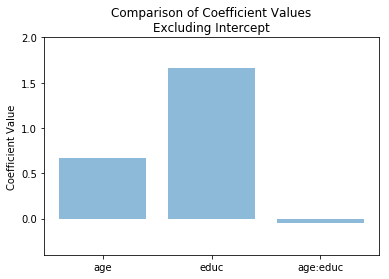

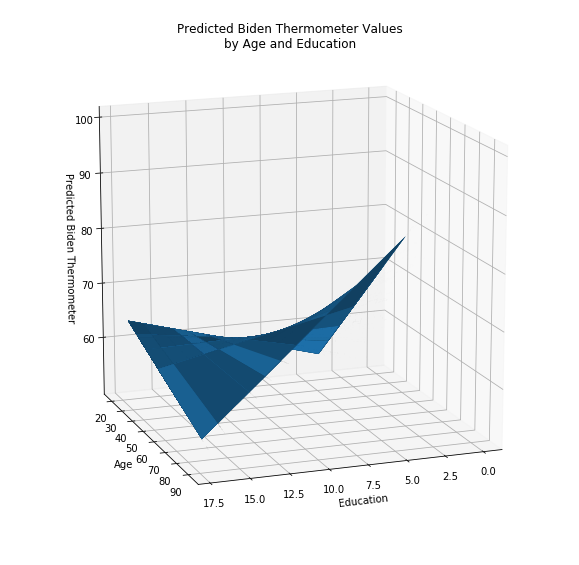

In [156]:
biden_df = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-research_Spr18/master/assignments/PS2/data/biden.csv")
biden_df.dropna(inplace = True)

# borrowing from https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame#19991632
result = sm.ols(formula="biden ~ age + educ + age:educ", data=biden_df).fit()
coeffs = result.params.values
print(result.summary())


objects = tuple(result.params.index[1:])
y_pos = np.arange(len(objects))

objects = result.params.index[1:]
y_pos = np.arange(len(objects))
performance = coeffs[1:]
 
# https://pythonspot.com/matplotlib-bar-chart/
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficient Values\nExcluding Intercept')
plt.ylim(-0.4, 2.0)

fig = plt.figure(figsize =(10,10))
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(np.array(biden_df.educ), np.array(biden_df.age))
preds = []
for i, j in zip(X,Y):
    preds.append(coeffs[0] + (coeffs[1]*j) + (coeffs[2] * i) + (i * j * coeffs[3]))
Z = np.array(preds)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Predicted Biden Thermometer')
plt.title("Predicted Biden Thermometer Values\nby Age and Education")
ax.view_init(15, 70)


COEFFICIENTS
 Intercept    38.373510
age           0.671875
educ          1.657425
age:educ     -0.048034
dtype: float64

STANDARD ERRORS: 
 [9.564, 0.17, 0.714, 0.013]


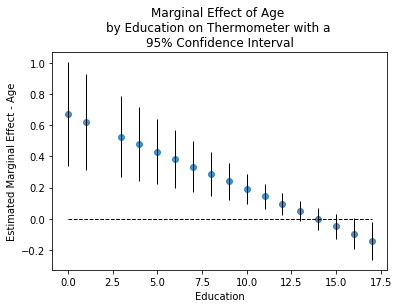

In [184]:
print('\nCOEFFICIENTS\n', result.params)
print('\nSTANDARD ERRORS: \n {}'.format([9.564, 0.170, 0.714, 0.013]))
# ref: Alexander Tyan
intercept, b1, b2, b3 = result.params
vcv = result.cov_params()
errors = pd.DataFrame()
errors["x"] = biden_df["educ"].unique()
errors["y"] = b1 + b3 * errors["x"]
errors["error"] = np.sqrt(vcv["age"]["age"] + 
                       errors["x"] ** 2 * 
                       vcv["age:educ"]["age:educ"] + 
                       2 * errors["x"] * vcv["age"]["age:educ"])
sns_plot = sns.regplot(x=errors["x"], y=errors["y"], fit_reg=False)
for index, row in errors.iterrows():
    sns_plot.vlines(x=row["x"], 
                     ymin=row["y"] + 1.96 * row["error"], 
                     ymax=row["y"] - 1.96 * row["error"], 
                     linewidth=1)
sns_plot.hlines(y=0,xmin=min(biden_df.educ), xmax=max(biden_df.educ), linewidth=1, linestyles="dashed")
sns_plot.set(xlabel='Education', ylabel='Estimated Marginal Effect - Age', title="Marginal Effect of Age \nby Education on Thermometer with a \n95% Confidence Interval");

The results of the above regression indicate for every year of age, an individual has $0.67 - 0.048 \times yearsofeducation$ units change (i.e., $0.67 -  0.048 X_2$) in their Biden thermometer rating. For individuals with no education, that is $X_2 = 0$, then for each additional year of age, we can expect to see 0.67 units increase in Biden thermometer ratings. Note the coefficient on the interaction term (-0.048) is quite small, and negative. This means that increases in age and education _taken together_ are associated with a small decrease in Biden thermometer ratings. 

These conclusions align with the intuition we can extract from the graphs above. Note the surface in "Predicted Biden Thermometer Values by Age and Education" has a saddle point close to 60 years of age, where the surface begins to curve away in four different directions. Based on these predictions, we can expect highly educated, older people to rate Biden lower than less educated, middle-aged people. Similarly, younger, more educated individuals are predicted to have higher Biden thermometer values than their less-educated peers. 

Turning now to the plot of marginal effects, we see that our intuition and interpretation were reasonable. Note in the plot of marginal effects that age becomes less statistically significant, even not statistically significant between 13 and 16, as education increases. This resembles the saddle point and ridge we see in the surface plot. However, for most education values, the marginal effect of age is statistically significant. 

# b)


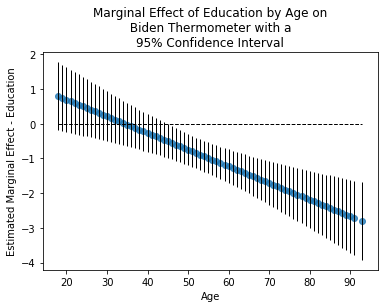

In [185]:
# ref: Alexander Tyan
intercept, b1, b2, b3 = result.params
vcv = result.cov_params()
errors = pd.DataFrame()
errors["x"] = biden_df["age"].unique()
errors["y"] = b2 + b3 * errors["x"]
errors["error"] = np.sqrt(vcv["educ"]["educ"] + 
                       errors["x"] ** 2 * 
                       vcv["age:educ"]["age:educ"] + 
                       2 * errors["x"] * vcv["educ"]["age:educ"])
sns_plot = sns.regplot(x=errors["x"], y=errors["y"], fit_reg=False)
for index, row in errors.iterrows():
    sns_plot.vlines(x=row["x"], 
                     ymin=row["y"] + 1.96 * row["error"], 
                     ymax=row["y"] - 1.96 * row["error"], 
                     linewidth=1)
sns_plot.hlines(y=0,xmin=min(biden_df.age), xmax=max(biden_df.age), linewidth=1, linestyles="dashed")
sns_plot.set(xlabel='Age', ylabel='Estimated Marginal Effect - Education', title="Marginal Effect of Education by Age on\n Biden Thermometer with a \n95% Confidence Interval");

Similar to (a), we can interpret the marginal effect of education on Biden thermometer ratings as indicating that for every year of education, if the individual had an age value of zero, we would expect to see an increase of 1.65 points in their Biden thermometer ratings. Moreover, an individual's Biden thermometer rating will change $biden = 1.65-0.048 \times age$ units for each year of education. 

That formulation lacks interpretability, so we will consider this point further using the plots above. Note in the surface plot "Predicted Biden Thermometer Values by Age and Education" how at the lower extrema of both education and age, we see low Biden thermometer scores. But these scores climb as we add years of education. However, large age values, which would eventually cause the second term to be larger than the first in the above equation, are associated with lower Biden thermometer scores. 

Turning to the marginal effects plot, we see our intuition was correct. However, the results are not statistically significant until approximately 45 years of age. This means that we cannot make a conclusion about the marginal effect of education for data points with age values less than 45. 